# Bisection Method

In [2]:
using Plots
using Printf

In [3]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [4]:
function bisection(f, a, b, n_max, tol; verbose = true)
    
    converged = false;
    p = 0;
    for i in 1:n_max

        p = 0.5 * (a+b); # compute the midpoint 
        
        # print current iterate information to screen 
        if verbose
            @printf(" %3d: a = %.8f, b = %.8f, p = %.8f, |f(p)|  = %g\n", i, a, b, p, abs(f(p)));
        end

        # determine if the root is in the left or right interval
        if ( f(a) * f(p)<=0)
            b = p; # root is interval [a,p]
        else
            a = p # root is in interval [p,b]
        end
        if(abs(f(p))==0)
            converged = true;
            break
        end
        
        # test for convergence
        if .5*(b-a)< tol
            converged = true;
            break
        end
    end
    
    if !converged
        @printf("ERROR: Did not converge after %d iterations\n", n_max);
    end

    return p # return midpoint guess
    
end

bisection (generic function with 1 method)

## Example 1
Find a root of $x^3 + 4x^2 - 10$ in $[1,2]$.

In [5]:
f = x-> x^3 + 4 * x^2 - 10;
 # or f(x) = x^3 + 4 * x^2 - 10;
a = 1;
b = 2;
n_max = 100;
tol = 1e-8;

bisection(f, a, b, n_max, tol)

   1: a = 1.00000000, b = 2.00000000, p = 1.50000000, |f(p)|  = 2.375
   2: a = 1.00000000, b = 1.50000000, p = 1.25000000, |f(p)|  = 1.79688
   3: a = 1.25000000, b = 1.50000000, p = 1.37500000, |f(p)|  = 0.162109
   4: a = 1.25000000, b = 1.37500000, p = 1.31250000, |f(p)|  = 0.848389
   5: a = 1.31250000, b = 1.37500000, p = 1.34375000, |f(p)|  = 0.350983
   6: a = 1.34375000, b = 1.37500000, p = 1.35937500, |f(p)|  = 0.0964088
   7: a = 1.35937500, b = 1.37500000, p = 1.36718750, |f(p)|  = 0.0323558
   8: a = 1.35937500, b = 1.36718750, p = 1.36328125, |f(p)|  = 0.03215
   9: a = 1.36328125, b = 1.36718750, p = 1.36523438, |f(p)|  = 7.20248e-05
  10: a = 1.36328125, b = 1.36523438, p = 1.36425781, |f(p)|  = 0.0160467
  11: a = 1.36425781, b = 1.36523438, p = 1.36474609, |f(p)|  = 0.00798926
  12: a = 1.36474609, b = 1.36523438, p = 1.36499023, |f(p)|  = 0.0039591
  13: a = 1.36499023, b = 1.36523438, p = 1.36511230, |f(p)|  = 0.00194366
  14: a = 1.36511230, b = 1.36523438, p = 1.3

1.3652300089597702

In [6]:
n_max = 20;
a_vals = zeros(n_max);
b_vals = zeros(n_max);
p_vals = zeros(n_max);
a = 1;
b = 2;
p = 0;
for i in 1:n_max
    a_vals[i] = a;
    b_vals[i] = b;
    p = 0.5 *  (a+b);
    p_vals[i] = p;
    @printf(" %3d: a = %.8f, b = %.8f, p = %.8f, |f(p)| = %g\n", i, a, b, p, abs(f(p)));
    if ( f(a) * f(p)<=0)
        b = p;
    else
        a = p
    end    
end

anim = @animate for i=1:n_max
    xx = LinRange(1,2,100);
    ff = f.(xx);
    plot(xx, ff, label="f(x)")
    plot!([a_vals[i],b_vals[i]], [0,0], label="")
    plot!([p_vals[i],p_vals[i]],[0,f(p_vals[i])],label="")
    xlims!(1,2)
    ylims!(f(1), f(2))
    
    xlabel!("x");
    ylabel!("y")
    title!(@sprintf("n = %d", i))
end


   1: a = 1.00000000, b = 2.00000000, p = 1.50000000, |f(p)| = 2.375
   2: a = 1.00000000, b = 1.50000000, p = 1.25000000, |f(p)| = 1.79688
   3: a = 1.25000000, b = 1.50000000, p = 1.37500000, |f(p)| = 0.162109
   4: a = 1.25000000, b = 1.37500000, p = 1.31250000, |f(p)| = 0.848389
   5: a = 1.31250000, b = 1.37500000, p = 1.34375000, |f(p)| = 0.350983
   6: a = 1.34375000, b = 1.37500000, p = 1.35937500, |f(p)| = 0.0964088
   7: a = 1.35937500, b = 1.37500000, p = 1.36718750, |f(p)| = 0.0323558
   8: a = 1.35937500, b = 1.36718750, p = 1.36328125, |f(p)| = 0.03215
   9: a = 1.36328125, b = 1.36718750, p = 1.36523438, |f(p)| = 7.20248e-05
  10: a = 1.36328125, b = 1.36523438, p = 1.36425781, |f(p)| = 0.0160467
  11: a = 1.36425781, b = 1.36523438, p = 1.36474609, |f(p)| = 0.00798926
  12: a = 1.36474609, b = 1.36523438, p = 1.36499023, |f(p)| = 0.0039591
  13: a = 1.36499023, b = 1.36523438, p = 1.36511230, |f(p)| = 0.00194366
  14: a = 1.36511230, b = 1.36523438, p = 1.36517334, |f(p

Animation("/tmp/jl_UIsS46", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png", "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png"])

┌ Info: Saved animation to /tmp/jl_E1oPC1WZqf.gif
└ @ Plots /home/kagamirudo/.julia/packages/Plots/kLeqV/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_E1oPC1WZqf.gif")
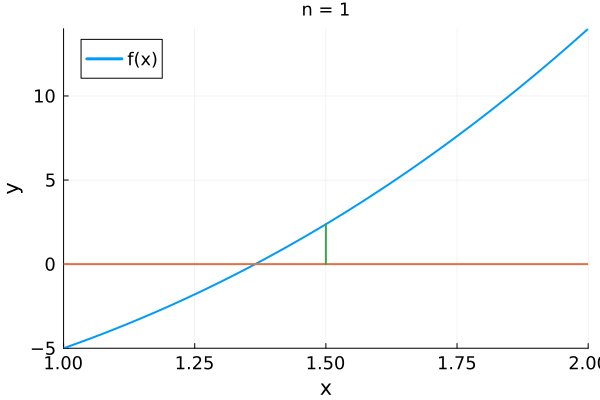

In [10]:
gif(anim,  fps = 10)

## Conservative Nature of the Error Estimator
The number of iterations the theorem predicts that to get 
$$
|p_n -p|< {\rm TOL},
$$
it is sufficient to take $n$ large enough such that
$$
\frac{b-a}{2^n} < {\rm TOL}
$$

will be needed to satisfy a particular absolute error is often much higher than needed.

Suppose, for the above problem, we want an absolute error $<10^{-3}$.  

In [8]:
p_exact = 1.3652300134141; # found elsewhere
a = 1;
b = 2;
TOL = 10^-3;

@show n_max= ceil(Int, log2((b-a)/TOL));

a_vals = zeros(n_max);
b_vals = zeros(n_max);
p_vals = zeros(n_max);
p = 0;
for i in 1:n_max
    a_vals[i] = a;
    b_vals[i] = b;
    p = 0.5 *  (a+b);
    p_vals[i] = p;
    if ( f(a) * f(p)<=0)
        b = p;
    else
        a = p
    end    
end

@show abs(p-p_exact);

n_max = ceil(Int, log2((b - a) / TOL)) = 10
abs(p - p_exact) = 0.0009722009140999965


In [9]:
@. abs(p_vals - p_exact)

10-element Vector{Float64}:
 0.1347699865859
 0.1152300134141
 0.009769986585900003
 0.0527300134141
 0.021480013414099997
 0.0058550134140999965
 0.0019574865859000035
 0.0019487634140999965
 4.361585900003462e-6
 0.0009722009140999965

Note that we had an answer within $10^{-3}$ after 9 iterations, even though the theorem said we needed 10.